# 编码和字节流

因为计算机只能处理数字，如果要处理文本，就必须先把文本转换为数字才能处理。最早的计算机在设计时采用8个比特（bit）作为一个字节（byte），所以，一个字节能表示的最大的整数就是255（二进制11111111=十进制255），如果要表示更大的整数，就必须用更多的字节。比如两个字节可以表示的最大整数是65535，4个字节可以表示的最大整数是4294967295。

由于计算机是美国人发明的，因此，最早只有127个字符被编码到计算机里，也就是大小写英文字母、数字和一些符号，这个编码表被称为ASCII编码，比如大写字母A的编码是65，小写字母z的编码是122。

但是要处理中文显然一个字节是不够的，至少需要两个字节，而且还不能和ASCII编码冲突，所以，中国制定了GB2312编码，用来把中文编进去。

![编码](pic/编码.png)

## 文本字符str和二进制字节bytes 

Python3 中 有两类玩意 str和bytes  
Python3 源码文件默认使用utf-8编码，所以可以正常解析中文，无需指定 UTF-8 编码  
Python2 时代 还需要指定编码 还有各种str和unicode的不同定义 直接忽略Python2 不要受毒害

默认在代码中写的字符串 都是被Python认为str格式的文本字符

In [1]:
a = '我是个Python么？'
print(type(a))

<class 'str'>


当然也可以用特殊标记 b 把文本字符搞成别的字符

In [3]:
a = b'Python'
print(type(a))

<class 'bytes'>


为什么没法运行？直接用b写bytes时 必须是ascii编码集 也就是一个字符一个byte 否则就错了

In [17]:
a = b'我是个Python么？'    
print(type(a))

SyntaxError: bytes can only contain ASCII literal characters. (<ipython-input-17-ef52e5a36ba9>, line 1)

事实上python提供了有三个标记 u r b  
u代表了unicode 万国码  
r代表了real 不转义字符  
b代表了bytes 字节码 计算机认得是字节码  

再加上什么都比写的纯纯的字符串

In [3]:
a = u'我是个Python'   # 这里的str还是str但是unicode的str
print(type(a))

<class 'str'>


In [4]:
a.encode()    # 默认编码为utf8的 bytes字节

b'\xe6\x88\x91\xe6\x98\xaf\xe4\xb8\xaaPython'

In [9]:
type(a.encode())

bytes

In [11]:
b = a.encode() 
b.decode()  # 默认也是utf8的解码 转str很正常

'我是个Python'

哎我有个大胆的想法 那一堆byte能不能手动拆拆？

In [5]:
(b'\xe6\x88\x91Python').decode()

'我Python'

出现乱码了 因为原来a是个unicode是小端存储 utf8是大端…… 后面讲

## 编码种类详解

### unicode 万国码  
* 内存中使用 无论什么运算进了内存先换成无敌翻译的万国码 万国码是定长的编码 很标准 内存很喜欢

在文本文件中，看到的所有字符，包括中文，都需要在计算机中存储，而计算机只能存储0和1这样的二进制位，所以需要一种方法，将字符映射成数字，然后将数字转化为二进制位存储在计算机中。针对字符和数字的映射的问题，产生了unicode编码，unicode将世界上的所有字符映射为唯一的数字。unicode数字并不是直接就可以转化为二进制存储，比如假设中文字符‘中’映射为数字1（00000001），‘国’映射为数字2（00000010），由于汉字很多，单字节并不能表示完所有的汉字，故可能会有汉字的unicode数字为258（00000001 00000010），假设为‘京’，现在在字符串中碰到存储为00000001 00000010的二进制串，不能区分出其实际代表的是“中国”还是“京”。

  针对unicode数字和二进制的映射问题，有两种解决方法：一种是每个unicode数字用固定宽度的二进制位表示，比如都用两字节，由此产生了ASCII、GB2312、GBK编码；另一种是存储的二进制位除了表示数字之外，还表示每个unicode数字的长度，由此产生了utf-8编码

### ASCII 祖宗码  
* 一个字符一个字节byte 

ASCII编码用单字节表示字符，最高位固定为0，故最多只能表示128个字符，当编程只涉及到英文字符或数字时，不涉及中文字符时，可以使用ASCII编码 

### GB 国标码  
* 中文编码

GB(GuoBiao)为国标，GBK(GuoBiao Kuozhan)表示国标扩展。GB2312兼容ASCII编码，对于ASCII可以表示的字符，如英文字符‘A’、‘B’等，在GB2312中的编码和ASCII编码一致，占一个字节，对于ASCII不能表示的字符，GB2312用两个字节表示，且最高位不为0，以防和ASCII字符冲突。例如：‘A’在GB2312中存储的字节十六进制为41，在ASCII中也是41，中文字符‘中’在GB2312中存储的两个字节十六进制为D6D0，最高位为1不为0。

  GB2312只有6763个汉字，而汉字特别多。GBK属于GB2312的扩展，增加了很多汉字，同时兼容GB2312，同样用两个字节表示非ASCII字符。

### UTF-8 变长编码  
* 变长 其实是为了存储空间更小 用于网络传输和硬盘存储

  和GB系列不同，UTF-8可以将全世界所有的unicode数字表示出来。UTF-8兼容ASCII编码，不兼容GB系列编码，因此，若文本中UTF-8和GB系列编码混用，会出现乱码问题。UTF-8对于每个字符的存储，用最高二进制位开始连续1的个数表示字的长度，最高位为0表示单字节，用来兼容ASCII字符，为110表示双字节，非字符首字节的字节都以10开始，如下表格所示。  
  例如：   
  
  字符‘中’的unicode编码为2D4E(00101101 01001110) 
  
  用UTF-8存储的二进制为E4B8AD(11100100 10111000 10101101 )  
  
  存储在计算机中的首字节为1110开头，表示此字符占三个字节，去掉开始字节表示长度的1110和其余字节开头的10
  
  可以得到01001110 00101101(4E2D)  
  
  可以看到和unicode数字刚好相反，是因为是大端存储方式，高字节存储在内存中的低地址端，反过来即为unicode编码

![utf8](pic/utf8.png)

In [8]:
a = 'ioio天地玄黄popop' 
print(type(a))
b1 = a.encode()
b2 = a.encode('GBK')

<class 'str'>


In [51]:
b1

b'\xe5\xa4\xa9\xe5\x9c\xb0\xe7\x8e\x84\xe9\xbb\x84'

In [52]:
b2

b'\xcc\xec\xb5\xd8\xd0\xfe\xbb\xc6'

瞎解码 出来乱码是好情况 还有可能不认识直接报错

In [9]:
b1.decode('GBK') # utf8的bytes转gbk 就这后果

'ioio澶╁湴鐜勯粍popop'

In [39]:
b1.decode('UTF-8')

'天地玄黄'

unicode格式有两种写法：  
* u'中文'  直接写字符串
* b'\uFFFF' 用16进制数字表示一个unicode字符 因为一个unicode俩byte

In [66]:
b'\u54c8dd'.decode('unicode_escape')  # \u只管四位十六进制数 后面是当ascii字符认得

'哈dd'

In [67]:
b'\u54c8\u54c9'.decode('unicode_escape') # 两个unicode

'哈哉'

* 两个byte的十六进制数字表示是\u  
* 单个byte的十六进制数字表示是\x

In [69]:
b'\xff\x34\x98'.decode('unicode_escape')  # unicode 俩byte 所以后面的0x98就管不着了  

'ÿ4\x98'

In [74]:
chr(0x98) # \x98和0x98  一个是字符串 一个是数字

'\x98'

观察utf-8的字节流写法 都是\x 因为他是变长的 不一定是俩byte 有可能一个

In [76]:
r'单个byte的十六进制数字表示是\x'.encode()

b'\xe5\x8d\x95\xe4\xb8\xaabyte\xe7\x9a\x84\xe5\x8d\x81\xe5\x85\xad\xe8\xbf\x9b\xe5\x88\xb6\xe6\x95\xb0\xe5\xad\x97\xe8\xa1\xa8\xe7\xa4\xba\xe6\x98\xaf\\x'

In [81]:
b'\xe5\x8d\x95\xe4\xb8\xaa'.decode()

'单个'

In [87]:
list(map(chr,bs))

['\x00', '¼', 'a', 'N']

In [91]:
hex(188)  # 超过128的ascii编码是扩展编码 显示问题而已 无所谓

'0xbc'

## 补充知识

### 补充：数值本身的进制转换

In [41]:
dec = 12345678
print("十进制数为：", dec)
print("转换为二进制为：", bin(dec))  # 0b开头
print("转换为八进制为：", oct(dec))  # 0o开头
print("转换为十六进制为：", hex(dec)) # 0x开头

十进制数为： 12345678
转换为二进制为： 0b101111000110000101001110
转换为八进制为： 0o57060516
转换为十六进制为： 0xbc614e


In [43]:
int('0xbc614e',16)

12345678

In [47]:
int('0b1010',2)

10

![进制](pic/进制.png)

注意：
    1. 这些进制转换函数 返回值都是字符串 是给人看的 如果要继续运算 直接用数值互相运算就可以了 都算完了再转换  
    2. python解释器默认是是十进制的 如果想看别的进制 才使用这种转换函数

In [11]:
type(hex(1234))

str

In [12]:
1234+0x121

1523

### 补充：按位运算

In [5]:
bin(0b10101010 & 0b11111111) # 与运算

'0b10101010'

In [7]:
bin(0b10101010 | 0b11111111) # 或运算

'0b11111111'

In [8]:
bin(0b10101010 ^ 0b11111111) # 异或运算

'0b1010101'

In [13]:
(~0b10101010) # 取反

-171

In [15]:
bin(0b1111000 >>3)

'0b1111'

In [16]:
(0b1111000 >>3)

15

### 补充：字符和数值的转换 ord和chr

ascii字符转数值

In [85]:
ord('A') 

65

数值（0-0x110000）转unicode字符（有ascii的形式 python解释器默认尽量翻译成ascii 实在没有就\uxxxxxxxx）

In [53]:
chr(0x10ffff) 

'\U0010ffff'

In [19]:
ord('哈') 

21704

In [20]:
hex(21704)

'0x54c8'

In [48]:
chr(0x54c8)

'哈'

## 数值 向字节流bytes的转换

* 例如：想把12345678转为字节流 麻烦在哪？  
    这个字节流要几个字节？c语言规定的标准是char一个字节float四个字节 但是python又没这个限制 咋办？

### 方法1：手动 chr或bytes强转

手动切四个字节 假装是一个4byte的int32

In [113]:
n = 12345678
print("转换为二进制为：", bin(n))
b1 = (n & 0xff000000) >> 24
b2 = (n & 0xff0000) >> 16
b3 = (n & 0xff00) >> 8            # 目的是取出来9到16位 01100001 00000000 移位把0去掉
b4 = n & 0xff                     # 和0b1111 1111求与运算 最低8位的二进制取出来
bs = bytes([b1, b2, b3, b4])      # 低位放在了高地址 这是大端顺序 后续讲大小端
bs

转换为二进制为： 0b101111000110000101001110


b'\x00\xbcaN'

In [3]:
hex(12345678)

'0xbc614e'

这里用了bytes方法给一个list强转为字节流 可以看一下帮助文档

In [33]:
help(bytes)

Help on class bytes in module builtins:

class bytes(object)
 |  bytes(iterable_of_ints) -> bytes
 |  bytes(string, encoding[, errors]) -> bytes
 |  bytes(bytes_or_buffer) -> immutable copy of bytes_or_buffer
 |  bytes(int) -> bytes object of size given by the parameter initialized with null bytes
 |  bytes() -> empty bytes object
 |  
 |  Construct an immutable array of bytes from:
 |    - an iterable yielding integers in range(256)
 |    - a text string encoded using the specified encoding
 |    - any object implementing the buffer API.
 |    - an integer
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__

In [29]:
bytes([b3])

b'a'

In [32]:
bytes([255])

b'\xff'

In [30]:
b3

97

In [25]:
hex(ord(bytes([0b01001110]).decode('ascii')))

'0x4e'

当然也可以用上面学的chr方法 逐个字符转换

In [122]:
n = 12345678
print("转换为二进制为：", bin(n))
b1 = (n & 0xff000000) >> 24
b2 = (n & 0xff0000) >> 16
b3 = (n & 0xff00) >> 8            # 目的是取出来9到16位 01100001 00000000 移位把0去掉
b4 = n & 0xff                     # 和0b1111 1111求与运算 最低8位的二进制取出来
bs = [chr(b1), chr(b2), chr(b3), chr(b4)]      # 低位放在了高地址 这是大端顺序 后续讲大小端
bs

转换为二进制为： 0b101111000110000101001110


['\x00', '¼', 'a', 'N']

In [134]:
list(map(ord,bs))  # 给字符list换成 0-255的数字 每个字符都是一个ascii字符而已

[0, 188, 97, 78]

问题是 int好办 如果是float还手动写 就凶残了 所以用别的办法

### 方法2：半自动 to_bytes   from_bytes
直接规定大小端 转换为字节

In [27]:
data = 100
data_byte = data.to_bytes(4, byteorder='little', signed=True)
print(type(data_byte), data_byte)
data_int = int.from_bytes(data_byte, byteorder='little', signed=True)
print(type(data_int), data_int)

<class 'bytes'> b'd\x00\x00\x00'
<class 'int'> 100


#### 大小端和地址
    * 大端
        1. 针对同一变量   高位字节存在低位 很反常 就是大端 也称为网络序 
        2. 例如：FF AA D1 B9 优先发送了高位数据 FF 对方接到了FF存到了内存低位 继续发送AA 对方接到了存到了内存高位
        3. 最后对方内存里长这样：（1）FF---- （2）AA---- （3）D1---- （4）B9----
    * 小端
        1. 针对同一变量   高位字节存在高位 很合理 就是小端 也称为本地序
        2. 例如：FF AA D1 B9 存在内存里或者硬盘里 
        3. 内存里长这样（1）B9---- （2）D1---- （3）AA---- （4）FF----

    * 地址
        1. 地址：地址就是一种字节流的存储顺序  
        2. 例如：b'abcd'  这个字节流里a就是低地址 d是高地址  
        3. 该字节流存入硬盘或者内存 也是按这个顺序存的 
        4. 例如：上面的小端 b'\xb9\xd1\xaa\xff'

In [114]:
n=0xFFAAD1B9

In [115]:
hex(n)

'0xffaad1b9'

In [120]:
n.to_bytes(length=8, byteorder='little', signed=True)   # 这方法有坑 这里用用就得了  
#小端顺序 高位在高地址0x00 低位在低地址0xdd （不足8个byte还补了0x00字节）

b'\xb9\xd1\xaa\xff\x00\x00\x00\x00'

In [117]:
n.to_bytes(length=8, byteorder='big', signed=True)  
# 大端顺序 高位在低地址 低位在高地址

b'\x00\x00\x00\x00\xff\xaa\xd1\xb9'

In [112]:
(12345678).to_bytes(length=4, byteorder='big', signed=True)  
# 大端顺序 高位在低地址 低位在高地址

b'\x00\xbcaN'

### 方法3：全自动 struct库 pack unpack

pack方法用于将int转化为bytes

In [98]:
import struct
struct.pack('>I', 12345678)   # 大端 按四字节unsigned int转换12345678 （结果就是[0, 188, 97, 78]）

b'\x00\xbcaN'

In [96]:
struct.unpack('>I',b'\x00\xbcaN')   

(12345678,)

In [99]:
print(struct.pack('>i', 12345678) )
print(struct.pack('>l', 12345678) )
print(struct.pack('>L', 12345678) )

b'\x00\xbcaN'
b'\x00\xbcaN'
b'\x00\xbcaN'


![struct](pic/struct.png)

其实最终压缩时候 看的是size 所以 i I L l是一码事 这些标识本质是为了可读性

## 读取文件

### 补充open的文件对象的常用方法

1. file.read([size])：size 未指定则返回整个文件，如果文件大小 >2 倍内存则有问题，f.read()读到文件尾时返回""(空字串)。

2. file.readline()：返回一行。

3. file.readlines([size]) ：返回包含size行的列表, size 未指定则返回全部行。

4. for line in f: print line ：通过迭代器访问。

5. f.write("hello\n")：如果要写入字符串以外的数据,先将他转换为字符串。

6. f.tell()：返回一个整数,表示当前文件指针的位置(就是到文件头的字节数)。

7. f.seek(偏移量,[起始位置])：用来移动文件指针。偏移量: 单位为字节，可正可负，起始位置: 0 - 文件头, 默认值; 1 - 当前位置; 2 - 文件尾

8. f.close() 关闭文件

### 文件分为两种
    1. 二进制文件 图片 数据 bin等等，本身存储的字节流有自己的意义 是一种协议
    2. 文本文件 txt log等等，本身是用utf8的字节流存在硬盘里（其实也是二进制的）
        可以用rb读进来之后decode
        也可以直接用r读进来文本（python替你解码了）
        还可以直接用记事本打开（记事本做了解码工作）

### 读取bmp文件（二进制文件）

In [13]:
with open('test.bmp','rb') as fp:
    print(fp.read(30))                 # read方法 默认参数是-1 读取全部字节流   59开始往后都是画本身了

b'BM\xbel\x01\x00\x00\x00\x00\x00>\x00\x00\x00(\x00\x00\x00\x80\x04\x00\x00\x88\x02\x00\x00\x01\x00\x01\x00'


In [16]:
import struct
with open('test.bmp','rb') as fp:
    fp.read(58)    # 跳过开头的58个
    for i in range(5):
        b = fp.read(4)
        char = struct.unpack('<f',b)
        print(char)
        print(ord(char[0])) 

(2.3509885615147286e-38,)


TypeError: ord() expected string of length 1, but float found

In [114]:
with open('test.bmp','rb') as fp:
    b = fp.read(30)               # 读前30个字节
    print(b)
    print(struct.unpack('<ccIIIIIIHH',b))    # 可以顺序写待读取的类型 但是最终长度必须等于30 否则会报错

b'BM\xbel\x01\x00\x00\x00\x00\x00>\x00\x00\x00(\x00\x00\x00\x80\x04\x00\x00\x88\x02\x00\x00\x01\x00\x01\x00'
(b'B', b'M', 93374, 0, 62, 40, 1152, 648, 1, 1)


两个字节：'BM'表示Windows位图，'BA'表示OS/2位图；一个4字节整数：表示位图大小；一个4字节整数：保留位，始终为0；一个4字节整数：实际图像的偏移量；一个4字节整数：Header的字节数；一个4字节整数：图像宽度；一个4字节整数：图像高度；一个2字节整数：始终为1；一个2字节整数：颜色数。

### 读取Python脚本（文本文件）  eval和exec的神奇用法

In [17]:
with open('test.py','rb') as fp:
    b = fp.read()
    print(b) 
    
b.decode()

b"print('hello \xe6\x8b\x8d\xe6\xa3\xae')"


"print('hello 拍森')"

我有个大胆的想法 手动用Python解释Python脚本

In [141]:
eval(b.decode())

hello 拍森


In [19]:
with open('test1.py','rb') as fp:
    b = fp.read()
    print(b) 
    
b.decode()

b'for i in range(10):\r\n    print(i)\r\ninput()'


'for i in range(10):\r\n    print(i)\r\ninput()'

In [20]:
eval(b.decode())

SyntaxError: invalid syntax (<string>, line 1)

eval不能处理赋值 只能表达式求值 如果要赋值 必须使用作用域说明的方法来实现

In [138]:
x=4
eval("3*x")

12

In [139]:
x=10
g={'a':4}
eval("a+1",g)   # eval 不能强行赋值  必须用字典作为作用于 传递给表达式

5

eval和apply是底层的循环 必须不断地：传入变量 求值 传入变量 求值 。。。

In [147]:
x = 10
def func():
    y = 20   #局部变量y
    a = eval("x+y")
    print("a:",a)      #x没有就调用全局变量
    b = eval("x+y",{"x":1,"y":2})     #定义局部变量，优先调用
    print("b:",b)
    c = eval("x+y",{"x":1,"y":2},{"y":3,"z":4})  
    print("c:",c)  
    d = eval("print(x,y)")
    print("d:",d)   #对于变量d，因为print()函数不是一个计算表达式，因此没有返回值
func()

a: 30
b: 3
c: 4
10 20
d: None


正规套路是exec 执行多行语句 直接运行 相比之下 exec没有返回值 

In [21]:
with open('test1.py','rb') as fp:
    b = fp.read()
    print(b) 
    
b.decode()

exec(b.decode())

b'for i in range(10):\r\n    print(i)\r\ninput()'
0
1
2
3
4
5
6
7
8
9
jjj


这俩玩意的用处一般是读取看似结构化的文件

In [161]:
with open('test2.xxx','r') as fp:
    index = 0
    for line in fp:
        print(line)
        temp = 'a'+str(index)+'='+line
        exec(temp)
        index +=1

[1,2,3,4,5]

[6,7,8,9,10]

[11,12,13,14,15]

[161,171,181,91,110]


In [162]:
print(a0)
print(a1)
print(a2)
print(a3)

[1, 2, 3, 4, 5]
[6, 7, 8, 9, 10]
[11, 12, 13, 14, 15]
[161, 171, 181, 91, 110]


## 小结

### * Python 不同进制数字int： 0x 0o 0b  
### * Python 字符串str
    1. 普通字符串         'yingwen中文都行'     （存下来的时候utf8 读内存里面换unicode的）
    2. 不转义字符串        r'\x\n\u2312'
    3. unicode字符串       u'yingwen中文都行\u2312'  
### * Python 字节流bytes  
    1. 普通ascii字节流        b'dasda1212'
    2. 掺入unicode的字节流    b'\uffaa\uffaaZ'      (\uffaa是一个两字节unicode字符 Z是ascii字符)
    3. 掺入utf8的字节流       b'\xe5\x8d\x95\xe4\xb8\xaa'
    4. 纯十六进制表示的字节流 b'\xe5'            (也许毫无意义 不符合任何编码 就是个野字节)  
### * Python编码格式   
    1. 只有字节流才管编码  str和int是python运行时候做的object而已
    2. 字节流其实可以描述为数字 0-255 两个十六进制数字 组合就是一个byte （也就是一个ascii字符)
    3. 所有编码格式 无非规定几个字节对应一个字符 ascii一个字节一个字符 unicode两个字节一个字符 utf8指不定几个字节一个字符
    4. （计算机看的）1111 1111 1111 1111  =>  （给码农看的）FF FF FF FF （数字都一样）=> （字符） 打印在屏幕上不一样 给人看的  
### * Python的str和int向字节流的转换
    1. str通过encode转为字节流   字节流通过decode转回str
    2. int（多种进制）通过chr转为单个字符 单个字符通过ord转回int
    3. 多种长度的数据例如float等 需要通过特定的库struct或者内置方法 转换为字节流 转换结果有长度截断和大小端区别
    4. 如果高位存在高位 就是小端 如果高位反而存在低位 就是大端  

# 正则表达式

识别电话号码 xxx-xxx-xxxx

In [24]:
def isPhoneNumber(text):
    if len(text) != 12:
        return False
    for i in range(0, 3):
        if not text[i].isdecimal():
            return False
    if text[3] != '-':
        return False
    for i in range(4, 7):
        if not text[i].isdecimal():
            return False
    if text[7] != '-':
        return False
    for i in range(8, 12):
        if not text[i].isdecimal():
            return False
    return True

print('415-555-4242 is a phone number:')
print(isPhoneNumber('415-555-4242'))
print('Moshi moshi is a phone number:')
print(isPhoneNumber('Moshi moshi'))

415-555-4242 is a phone number:
True
Moshi moshi is a phone number:
False


## A. Python正则表达式使用基础方法：  
1. re.match
2. re.search
3. 先制作pattern 然后pattern.match  pattern.search

为啥这么麻烦呢？在多次使用某个正则表达式时推荐使用正则对象Pattern 以增加复用性，因为通过 re.compile(pattern) 编译后的模块级函数会被缓存

![正则](pic/正则.png)

In [15]:
import re

### re match

In [61]:
a = r'umji'        # 最简单的正则表达式就是字符串
match = re.match(a,'xxxx umji isbest umji inworld')
print(match)
match = re.match(a,'umji isbest umji inworld')
print(match)

print(match.group())
print(match.start())
print(match.end())
print(match.span())
print(type(match.group()))

None
<re.Match object; span=(0, 4), match='umji'>
umji
0
4
(0, 4)
<class 'str'>


### re search

In [62]:
a = r'umji'        # 最简单的正则表达式就是字符串
match = re.search(a,'xxxx umji isbest umji inworld')
if match:
    print(match.group())  # 匹配内容  还可以groups返回全部 
    print(match.start())  # 匹配开始点
    print(match.end())    # 匹配结束点
    print(match.span())   # 匹配起止点的tuple
    print(type(match.group()))

umji
5
9
(5, 9)
<class 'str'>


match 从头匹配  search 随便匹配

###  pattern对象

#### 最简单匹配 数字加连字符

In [27]:
Reg = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

In [35]:
# dir(Reg)

In [36]:
type(Reg)

re.Pattern

In [28]:
M = Reg.search('dafdafdsfadsfds 400-200-1111')

In [31]:
M

<re.Match object; span=(16, 28), match='400-200-1111'>

group方法

In [38]:
M.group()

'400-200-1111'

In [47]:
M.groups()

()

#### 分组匹配

假定想要将区号从电话号码中分离。添加括号将在正则表达式中创建“分组”

分组的意义在于分组返回  
(r'(\d\d\d)-(\d\d\d-\d\d\d\d)'  
使用括号给表达式分组

In [45]:
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')
reg = phoneNumRegex.search('My number is 415-555-4242.')

In [46]:
reg.group()

'415-555-4242'

In [47]:
reg.group(0)

'415-555-4242'

In [48]:
reg.group(1)

'415'

In [49]:
reg.group(2)

'555-4242'

In [51]:
reg.groups()

('415', '555-4242')

In [52]:
phoneNumRegex.findall('My number is 415-555-4242.')

[('415', '555-4242')]

## B. pattern的编写 《重点》
1. 位置 
2. 字符
3. 数量
4. 逻辑

### 1. 位置

匹配每一行的开头结尾

In [152]:
Rex = re.compile(r'^M')
reg = Rex.search('My number is 415-555-4242.')
reg.group()

'M'

In [151]:
Rex = re.compile(r'^M',re.M)  # 多行模式 后续介绍
reg = Rex.search('xx number is 415-555-4242.\nMy number is 415-555-4242.')
reg.group(0)

'M'

In [141]:
Rex = re.compile(r'M$')
reg = Rex.search('My number is 415-555-4242.M')
reg.group()

'M'

仅匹配字符串开头结尾

In [154]:
Rex = re.compile(r'\AM',re.M)  # 多行模式 后续介绍
reg = Rex.search('Mxx number is 415-555-4242.\nMy number is 415-555-4242.')
reg.group(0)

'M'

In [159]:
Rex = re.compile(r'M\Z')
reg = Rex.search('y number is 415-555-4242.M')
reg.group()

'M'

### 2. 字符

一般字符串 严格匹配自己 同时注意转义字符

In [111]:
Rex = re.compile(r'umb')
reg = Rex.search('My number is 415-555-4242.')
reg.group()

'umb'

In [142]:
Rex = re.compile(r'umb\\')
reg = Rex.search('My numb\er is 415-555-4242.')
reg.group()

'umb\\'

单个占位 .    
这里一般不能匹配换行符

In [85]:
Rex = re.compile(r'M.')
reg = Rex.search('My number is 415-555-4242.')
reg.group()

'My'

In [88]:
Rex = re.compile(r'M....')
reg = Rex.search('My number is 415-555-4242.')
reg.group()

'My nu'

In [112]:
Rex = re.compile(r'M....mb')
reg = Rex.search('My number is 415-555-4242.')
reg.group()

'My numb'

字符集 在同一个位置 匹配好些个字符

In [169]:
Rex = re.compile(r'M[h-z]numb')
reg = Rex.search('Mynumber is 415-555-4242.')
reg.group()

'Mynumb'

In [171]:
Rex = re.compile(r'M[ayz]numb')
reg = Rex.search('Mynumber is 415-555-4242.')
reg.group()

'Mynumb'

In [175]:
Rex = re.compile(r'M[^a-h]numb')  # 除了a到h的其他一切字符
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'M\nnumb'

特殊字符

数字 \\d

In [176]:
Rex = re.compile(r'\d') 
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'4'

In [177]:
Rex = re.compile(r'[1-9]') 
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'4'

In [185]:
Rex = re.compile(r'\D')  # 非数字
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'M'

In [179]:
Rex = re.compile(r'[^0-9]')  
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'M'

空白字符 \\s

In [180]:
Rex = re.compile(r'\sis') 
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

' is'

In [181]:
Rex = re.compile(r'\sn') 
reg = Rex.search('M\nnumber is 415-555-4242.')
reg.group()

'\nn'

In [182]:
Rex = re.compile(r'\sn')  
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

'\tn'

In [183]:
Rex = re.compile(r'[ \t\r\f\n\v]') # 空格 制表 回车 换页 换行 垂直制表
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

'\t'

In [184]:
Rex = re.compile(r'\s\Ss') #非空白字符
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

' is'

单词字符 \\w

In [186]:
Rex = re.compile(r'\w\w\s')
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

'er '

In [190]:
Rex = re.compile(r'[A-Za-z0-9]')
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

'M'

In [189]:
Rex = re.compile(r'\W') #非单词
reg = Rex.search('M\tnumber is 415-555-4242.')
reg.group()

'\t'

中文字符

In [205]:
Rex = re.compile(r'\w爆炸\w')
reg = Rex.search('M\tnu爆炸mber is 415-555-4242.')
reg.group()

'u爆炸m'

In [206]:
Rex = re.compile(r'[\u4e00-\u9fa5]')  # 全部中文字符
reg = Rex.search('M\tnu爆炸mber is 415-555-4242.')
reg.group()

'爆'

### 3. 数量

多次匹配前一个字符  
? 0或1  
\+ 1到无限大  
\* 0到无限大

In [98]:
Rex = re.compile(r'M+') #匹配一个以上的M
reg = Rex.search('dafdfdaMMMMfdfds number is 415-555-4242.')
reg.group()

'MMMM'

In [113]:
Rex = re.compile(r'daM+') #匹配一个以上的M
reg = Rex.search('dafdfdaMMMMfdfds number is 415-555-4242.')
reg.group()

'daMMMM'

In [121]:
Rex = re.compile(r'M?')  # 默认匹配零个 所以匹配了个寂寞
reg = Rex.search('dafdfdaMfdfds number is 415-555-4242.')
reg.group()

''

In [32]:
Rex = re.compile(r'daM?')  # 默认匹配零个M 所以只剩下了da
reg = Rex.search('xxxdaMMs number is 415-555-4242.')
reg.group()

'daM'

In [33]:
Rex = re.compile(r'daM?')  # 返回了第一个匹配到的da 就停止了
reg = Rex.search('dadadaMMs number is 415-555-4242.')
reg.group()

'da'

In [119]:
Rex = re.compile(r'ABM?')  # 匹配零个或一个M
reg = Rex.search('dafdfMABMdafdfds number is 415-555-4242.')
reg.group()

'ABM'

In [110]:
Rex = re.compile(r'ABM?')  # 匹配零个或一个M
reg = Rex.search('dafdfMABxxxdafdfds number is 415-555-4242.')
reg.group()

'AB'

匹配规定次数前一个字符

In [130]:
Rex = re.compile(r'daM{4}')  # 匹配M4次
reg = Rex.search('dadaMMMMdadada  number is 415-555-4242.')
reg.group()

'daMMMM'

In [192]:
Rex = re.compile(r'daM{2,4}')  # 匹配M2到4次 默认是贪心匹配更多 
reg = Rex.search('dadaMMMMMMdadada  number is 415-555-4242.')
reg.group()

'daMMMM'

In [193]:
Rex = re.compile(r'daM{2,4}?')  # 匹配M2到4次 改为非贪心匹配更少 
reg = Rex.search('dadaMMMMMMdadada  number is 415-555-4242.')
reg.group()

'daMM'

宇宙级别匹配 .*  
匹配任意非换行符的零到无数次重复

In [214]:
Rex = re.compile(r'.*') 
reg = Rex.search('xx number is 415-555-4242.\nMy number is 415-555-4242.')
reg.group()

'xx number is 415-555-4242.'

### 4. 逻辑

别忘了括号分组 可以整合为一个单元

In [138]:
Rex = re.compile(r'(ABM)*')  # 匹配零到无数个ABM
reg = Rex.search('ABMABMABxdafdfds number is 415-555-4242.')
reg.group()

'ABMABM'

注意：任何零匹配 从头开始的陷阱

In [140]:
Rex = re.compile(r'(ABM)*')  # 匹配零到无数个ABM 开始就匹配到了 零个ABM 匹配了个寂寞
reg = Rex.search('xxABMABMABxdafdfds number is 415-555-4242.')
reg.group()

''

或者

In [195]:
Rex = re.compile(r'(ABM)|(BCD)')  
reg = Rex.search('BCDABMABMABxdafdfds number is 415-555-4242.')
reg.group()

'BCD'

In [196]:
Rex = re.compile(r'A(bc|de)F')  
reg = Rex.search('AdeFxdafdfds number is 415-555-4242.')
reg.group()

'AdeF'

分组的引用

In [203]:
Rex = re.compile(r'(ABM)...(ABN)\1')   # 真的懒成这样么 写这样能好懂么  而且从1计数是想要怎样
reg = Rex.search('ABMfdsABNABM number is 415-555-4242.')
reg.group()

'ABMfdsABNABM'

In [263]:
Rex = re.compile(r'(?P<name1>ABM)...(ABN)(?P=name1)')   # 别名更是花里胡哨
reg = Rex.search('ABMfdsABNABM number is 415-555-4242.')
reg.group()

'ABMfdsABNABM'

In [264]:
reg

<re.Match object; span=(0, 12), match='ABMfdsABNABM'>

## C. re提供的正则方法

1. 匹配类（也既是查找一个） match从头匹配 search非从头匹配 fullmatch全文匹配
2. 查找类（也既是查找多个） findall返回list  finditer返回迭代器
3. 分割类 雷同于str对象的split方法 在大数据量上表现更优
4. 替换类 sub和subn

In [261]:
p = re.compile(r'\d+')
print(p.findall('one1two2three3four4'))   # 直接给列表

['1', '2', '3', '4']


In [262]:
p = re.compile(r'\d+')
for m in p.finditer('one1two2three3four4'):     # 迭代器 
    print(m.group())

1
2
3
4


In [235]:
p = re.compile(r'\d+')
print(p.split('one1333two2three3four4'))

['one', 'two', 'three', 'four', '']


In [246]:
p = re.compile(r'\d+')
print(p.split('one1333two2three3four4',3))

['one', 'two', 'three', 'four4']


替换 可以使用编号和命名来制定交换

In [258]:
p = re.compile(r'(\w+) (\w+)')   # 创建pattern  匹配空格链接的两个单词
s = 'i say, hello world!'        # 待处理字符串

print(p.sub(r'\2 \1 aha', s))        # \2\1是用来匹配第二个和第一个括号单元的

say i aha, world hello aha!


In [257]:
p = re.compile(r'(?P<name1>\w+) (?P<name2>\w+)')   # 创建pattern  匹配空格链接的两个单词
s = 'i say, hello world!'        # 待处理字符串

print(p.sub(r'\g<name2> \g<name1>', s))        # 这里用g 代表的是get 区分上面明明的put

say i, world hello!


更神的是可以在这里召唤一等公民函数  
函数只能有一个参数 就是匹配到的字符串本身

In [260]:
p = re.compile(r'(?P<name1>\w+) (?P<name2>\w+)')  
s = 'i say, hello world!'   

def func(m):
    return m.group(1).title() + ' ' + m.group(2).title()   # 这里 title是str的方法 首字母大写
 
print(p.sub(func, s))

I Say, Hello World!


In [265]:
p = re.compile(r'(?P<name1>\w+) (?P<name2>\w+)')  
s = 'i say, hello world!'   
reg = p.search(s)

In [270]:
type(reg.group(2))

str

subn 功能雷同 只是返回了完成替换的次数

In [271]:
p = re.compile(r'(\w+) (\w+)')
s = 'i say, hello world!'
 
print(p.subn(r'\2 \1', s))

('say i, world hello!', 2)


## D. 匹配模式设置

re.I(re.IGNORECASE): 忽略大小写（括号内是完整写法，下同）  
re.M(MULTILINE): 多行模式，改变'^'和'$'的行为（参见上图）  
re.S(DOTALL): 点任意匹配模式，改变'.'的行为  
re.L(LOCALE): 使预定字符类 \w \W \b \B \s \S 取决于当前区域设定  
re.U(UNICODE): 使预定字符类 \w \W \b \B \s \S \d \D 取决于unicode定义的字符属性  
re.X(VERBOSE): 详细模式。这个模式下正则表达式可以是多行，忽略空白字符，并可以加入注释  

其实这些模式标识也是一种对象

In [223]:
dir(re.I)

['__class__',
 '__doc__',
 '__module__',
 'as_integer_ratio',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'name',
 'numerator',
 'real',
 'to_bytes',
 'value']

In [209]:
Rex = re.compile(r'My',re.I)  # 大小写忽略模式
reg = Rex.search('my number is 415-555-4242.')
reg.group()

'my'

In [213]:
Rex = re.compile(r'^M',re.M)  # 多行模式    请注意这里和verbose模式的区别 待匹配的字符串是多行的
reg = Rex.search('''xx number is 415-555-4242.\nMy number is 415-555-4242.''')
reg.group()

'M'

In [216]:
Rex = re.compile(r'.*',re.S)     # 点更牛逼模式  点可以匹配换行符了
reg = Rex.search('xx number is 415-555-4242.\nMy number is 415-555-4242.')
reg.group()

'xx number is 415-555-4242.\nMy number is 415-555-4242.'

re.L 字符集本地化。这个功能是为了支持多语言版本的字符集使用环境的，比如在转义符\w，在英文环境下，它代表[a-zA-Z0-9_]，即所以英文字符和数字。如果在一个法语环境下使用，缺省设置下，不能匹配"é" 或   "ç"。加上这L选项和就可以匹配了。不过这个对于中文环境似乎没有什么用，它仍然不能匹配中文字符。

In [218]:
a = re.compile(r"""\d +  # the integral part
                   \.    # the decimal point
                   \d *  # some fractional digits""", re.X)    # verbose模式下 的pattern是多行的
b = re.compile(r"\d+\.\d*")

In [219]:
reg = a.search('xx number is 415.555-4242.\nMy number is 415-555-4242.')
reg.group()

'415.555'

In [220]:
reg = b.search('xx number is 415.555-4242.\nMy number is 415-555-4242.')
reg.group()

'415.555'

其实模式也可以写在pattern里面  
诡异的是 标识字符是(?iLmusx)  
只有L大写的 不过反正L也不大用 都小写算了

In [241]:
Rex = re.compile(r'(?i)My')  # 大小写忽略模式
reg = Rex.search('my number is 415-555-4242.')
reg.group()

'my'

In [244]:
Rex = re.compile(r'(?m)^M')  # 多行模式    请注意这里和verbose模式的区别 待匹配的字符串是多行的
reg = Rex.search('''xx number is 415-555-4242.\nMy number is 415-555-4242.''')
reg.group()

'M'

# 正则表达式的应用


## 从没有严格结构的文本流中提取数据

In [171]:
import re
with open('Epoch Report.txt','r') as fp:
    content = fp.read()

Rex = re.compile(r'[LWR]\s{3}\d+|N[123]\s{2}\d+')
reg = Rex.findall(content)
len(reg)

1879

## 修改替换文字

In [176]:
import re
with open('Epoch Report.txt','r') as fp:
    content = fp.read()

Rex = re.compile(r'[LWR]\s{3}\d+|N[123]\s{2}\d+')
result = Rex.sub(r'STAGE', content)

with open('Epoch Report1.txt','w') as fp:
    fp.write(result)

## 查找包含特定字符串的文件

In [172]:
grep -r '面向对象' ./*

SyntaxError: invalid syntax (<ipython-input-172-e76863d12fe5>, line 1)

## 监听剪贴板

In [5]:
import pyperclip,re

pyperclip 模块  

copy方法 等同于按下ctrl c  

paste方法 等同于按下ctrl v  

In [15]:
pyperclip.paste()

'dafadfdsafaszz@gmail.com'

电话匹配

(212).234-1203     ext.    11030

In [114]:
phoneRegex = re.compile(r'''(
                            (\d{3}|\(\d{3}\))?             # area code  三个数字 或者是转义括号包着三个数字
                            (\s|-|\.)?                     # separator  分隔符可能是空白 连接符 或者转义句号
                            (\d{3})                        # first 3 digits
                            (\s|-|\.)                      # separator
                            (\d{4})                        # last 4 digits
                            (\s*(ext|x|ext.)\s*(\d{2,5}))? # extension 任意长空格 ext x ext. 任意空格 二到五数字
                            )''', re.VERBOSE)
print(pyperclip.paste())
b = phoneRegex.findall(pyperclip.paste())
print(b)

(212).234-1203 ext. 11030
[('(212).234-1203 ext. 11030', '(212)', '.', '234', '-', '1203', ' ext. 11030', 'ext.', '11030')]


这是为什么？ 因为用了括号分组

In [41]:
phoneRegex = re.compile(r'''(
                            (\d{3}|\(\d{3}\))?             # area code  三个数字 或者是转义括号包着三个数字
                            (\s|-|\.)?                     # separator  分隔符可能是空白 连接符 或者转义句号
                            (\d{3})                        # first 3 digits
                            (\s|-|\.)                      # separator
                            (\d{4})                        # last 4 digits
                            (\s*(ext|x|ext.)\s*(\d{2,5}))? # extension 任意长空格 ext x ext. 任意空格 二到五数字
                            )''', re.VERBOSE)
b = phoneRegex.match(pyperclip.paste())
b.group()

'(212).234-1203'

email匹配

dafadfdsafaszz@gmail.com

In [110]:
emailRegex = re.compile(r'''([a-zA-Z0-9._%+-]+
                            @
                            [a-zA-Z0-9.-]+
                            (\.[a-zA-Z]{2,4})
                            )''', re.VERBOSE)

In [111]:
emailRegex.findall('  gx@gmail.com  ')

[('gx@gmail.com', '.com')]

In [112]:
text = str(pyperclip.paste())
matches = []

for groups in phoneRegex.findall(text):
    phoneNum = '-'.join([groups[1], groups[3], groups[5]])
    if groups[8] != '':
        phoneNum += ' x' + groups[8]
    matches.append(phoneNum)
    
for groups in emailRegex.findall(text):
    matches.append(groups[0])

In [113]:
matches

['(212)-234-1203',
 '(212)-234-1203',
 '(212)-234-1203',
 'dafadfdsafaszz@gmail.com']

In [115]:
if len(matches) > 0:
    pyperclip.copy('\n'.join(matches))
    print('Copied to clipboard:')
    print('\n'.join(matches))
else:
    print('No phone numbers or email addresses found.')

Copied to clipboard:
(212)-234-1203
(212)-234-1203
(212)-234-1203
dafadfdsafaszz@gmail.com


一个拷贝页面 识别各种文本的工具  
日期格式模糊匹配 整理为标准格式保存  
拷贝之后把密码和身份证等信息用xxxx替代  
英文标准化 删除多余空格 把两个以上的空格改为一个 给标点后加空格  

# 中文分词库jieba

官方github仓库
https://github.com/fxsjy/jieba

扩展阅读：对Python中文分词模块结巴分词算法过程的理解和分析 https://blog.csdn.net/rav009/article/details/12196623   

In [2]:
import jieba 
import jieba.posseg as pseg  # 词性分析

paddle模式 百度的ai框架提供的支持

安装paddle的支持 官方github上提到的pip install paddlepaddle-tiny有问题

In [13]:
!pip install paddlepaddle  

In [11]:
jieba.enable_paddle()

Paddle enabled successfully......


## 分词

* 全模式：所有可能的拆分方式都分出来 出现很多重叠  
* 精确模式：精确地拆分句子 不允许重叠

In [18]:
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=True) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Paddle Mode: 我/来到/北京清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国科学技术大学
Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 词性分析

In [16]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)
for word, flag in words:
     print('%s %s' % (word, flag),end=' ')

一片 m 寂静 a 之 u 中， nz 只 d 听得 v 蹄声 n 嗒 xc 嗒 xc ， v 车轮 n 在 p 石板 n 上 f 隆隆 PER 滚动 v 

In [42]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)
type(words)

generator

In [43]:
temp = next(words)
type(temp)

jieba.posseg.pair

分词之后是jieba特有的pair对象 赋值类似于元祖 但是没有索引

In [24]:
temp

pair('一片', 'm')

In [26]:
a,b = temp

In [27]:
print(a)
print(b)

一片
m


<table>
<thead>
<tr>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
</tr>
</thead>
<tbody>
<tr>
<td>n</td>
<td>普通名词</td>
<td>f</td>
<td>方位名词</td>
<td>s</td>
<td>处所名词</td>
<td>t</td>
<td>时间</td>
</tr>
<tr>
<td>nr</td>
<td>人名</td>
<td>ns</td>
<td>地名</td>
<td>nt</td>
<td>机构名</td>
<td>nw</td>
<td>作品名</td>
</tr>
<tr>
<td>nz</td>
<td>其他专名</td>
<td>v</td>
<td>普通动词</td>
<td>vd</td>
<td>动副词</td>
<td>vn</td>
<td>名动词</td>
</tr>
<tr>
<td>a</td>
<td>形容词</td>
<td>ad</td>
<td>副形词</td>
<td>an</td>
<td>名形词</td>
<td>d</td>
<td>副词</td>
</tr>
<tr>
<td>m</td>
<td>数量词</td>
<td>q</td>
<td>量词</td>
<td>r</td>
<td>代词</td>
<td>p</td>
<td>介词</td>
</tr>
<tr>
<td>c</td>
<td>连词</td>
<td>u</td>
<td>助词</td>
<td>xc</td>
<td>其他虚词</td>
<td>w</td>
<td>标点符号</td>
</tr>
<tr>
<td>PER</td>
<td>人名</td>
<td>LOC</td>
<td>地名</td>
<td>ORG</td>
<td>机构名</td>
<td>TIME</td>
<td>时间</td>
</tr>
</tbody>
</table>

In [6]:
# 滤出所有名词
def foo(flag):
    if flag == 'n':
        return True
    return False

In [38]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)  # 生成器

for word,flag in words:
    if foo(flag):
        print(word)

蹄声
车轮
石板


In [39]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)  # 生成器

[word for word,flag in words if foo(flag)] 

['蹄声', '车轮', '石板']

## 停用词去除和词云制作

读一本金庸小说进来

In [93]:
with open('./jinyong/金庸-天龙八部txt精校版.txt','r') as fp:
    strs = fp.read()

len(strs)

1283405

In [94]:
words = pseg.cut(strs[:],use_paddle=True)  # 生成器
N = [word for word,flag in words if foo(flag)] 

停用词处理

In [95]:
# 读入停用词 做成list
def get_stopwords_list():
    #按行制作list 并且去掉行首位的空格
    stopwords = [line.strip() for line in open('baidu_stopwords.txt',encoding='UTF-8').readlines()]  
    return stopwords

In [96]:
# 删除停用词
def move_stopwords(sentence_list, stopwords_list):
    # 去停用词
    res = []
    for word in sentence_list:
        if word not in stopwords_list:
            word = re.sub(r'[0123456789，。.\s]+', '', word)  # 去掉数字标点和空格
            res.append(word)
    return res

In [97]:
wordlist = move_stopwords(N, get_stopwords_list())

词云库安装

In [98]:
!pip install wordcloud

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [100]:
# 必须给个符号分隔开分词结果来形成字符串,否则不能绘制词云
wordstr = " ".join(wordlist)

In [101]:
wc = WordCloud(
        # 设置字体，不指定就会出现乱码
        font_path=r'C:\Windows\Fonts\msjh.ttc',
        # 设置背景色
        background_color='white',
        # 最大字体
        max_font_size=80,
        # 最小字体
        min_font_size=20,
        mode='RGBA',
        mask=np.array(Image.open( r'./pic/武侠.png'))
        #colormap='pink'
        )

In [102]:
wc.generate(wordstr)

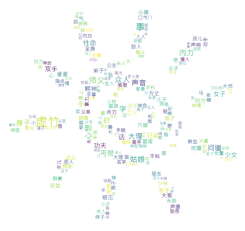

In [103]:
plt.figure("jinyong")
plt.imshow(wc)
plt.axis("off")
plt.show()


wc.to_file("./pic/cloud_result.png")

# 文件和操作系统

In [35]:
import os

## 文件路径

### 当前工作路径返回

In [2]:
os.getcwd()

'C:\\Users\\Think\\课程\\3UB_python基础'

### 路径跳转

In [3]:
os.chdir('C:\\Windows\\System32')
os.getcwd()

'C:\\Windows\\System32'

### 非转义字符串描述windows文件路径

In [16]:
os.chdir(r'D:\\myproj\stopwords')
os.getcwd()

'D:\\myproj\\stopwords'

###  相对路径  两个点 ..父目录 一个点 .本目录

In [17]:
os.chdir(r'..')
os.getcwd()

'D:\\myproj'

In [18]:
os.chdir(r'./stopwords')  # 斜杠反斜杠 其实os帮你处理好了 可以一定程度上混用 舒服
os.getcwd()

'D:\\myproj\\stopwords'

###  创建目录

In [24]:
os.chdir('C:\\Users\\Think\\课程\\3UB_python基础')  # 先切换到课程文件根目录
os.getcwd()

'C:\\Users\\Think\\课程\\3UB_python基础'

In [29]:
try:
    os.makedirs('./dir/dir/dir/dir')
except:
    pass

In [30]:
os.chdir('./dir/dir/dir/dir')

In [31]:
os.getcwd()

'C:\\Users\\Think\\课程\\3UB_python基础\\dir\\dir\\dir\\dir'

### 多重父目录跳到pic图片目录

In [32]:
os.chdir('../../../../pic')

In [33]:
os.getcwd()

'C:\\Users\\Think\\课程\\3UB_python基础\\pic'

### 相对路径实在懒得思考了 来个自动方法   目标路径，原路径

In [36]:
os.path.relpath('C:\\Users\\Think\\课程\\3UB_python基础\\pic','C:\\Users\\Think\\课程\\3UB_python基础\\dir\\dir\\dir\\dir')

'..\\..\\..\\..\\pic'

### 路径构造和绝对路径

In [37]:
os.path.abspath('.')

'C:\\Users\\Think\\课程\\3UB_python基础\\pic'

### dirname basename 和 split

dirname其实就是针对字符串的简单操作 把最后一个斜杠或者反斜杠或者转义斜杠前面的容返回

In [39]:
os.path.dirname('C:\\Users\\Think\\课程\\3UB_python基础\\pic')

'C:\\Users\\Think\\课程\\3UB_python基础'

basename就是最后斜杠后面的内容

In [40]:
os.path.basename('C:\\Users\\Think\\课程\\3UB_python基础\\pic')

'pic'

In [41]:
os.path.dirname('dfadaxxx8**\\pic')

'dfadaxxx8**'

split直接返回dirname和basename

In [42]:
os.path.split('C:\\Users\\Think\\课程\\3UB_python基础\\pic')

('C:\\Users\\Think\\课程\\3UB_python基础', 'pic')

### 文件大小

In [49]:
os.path.getsize('C:\\Users\\Think\\课程\\3UB_python基础\\L5_编码 正则表达式 文本处理.ipynb')

185968

### 目录全部文件名

In [50]:
os.listdir()  # 默认参数就是当前目录

['778496-20180713200909560-1043089630.png',
 'array.png',
 'cloud_result.png',
 'generator.png',
 'numpytype.png',
 'oop.png',
 'python.png',
 'struct.png',
 'test.bmp',
 'utf8.png',
 '正则.png',
 '武侠.png',
 '编码.png',
 '进制.png']

## 示例 获取目录大小
    获取目录下裸文件的总大小

In [55]:
totalSize = 0
for filename in os.listdir('C:\\Users\\Think\\课程\\3UB_python基础'):
    totalSize = totalSize + os.path.getsize(os.path.join('C:\\Users\\Think\\课程\\3UB_python基础', filename))
totalSize

22304455

    1. 递归
    2. 判断是目录还是文件 文件计算大小 目录进行递归
    3. 结束条件就是发现是个文件 计算大小

In [51]:
path = 'C:\\Users\\Think\\课程\\3UB_python基础'
# 定义函数
def foldersize(path):
    # 获取文件夹内所有文件名称
    listdirs = os.listdir(path) 
    # 打印文件夹下文件数量
    print(f'{path}中文件数量为：{len(listdirs)}')
    # 打印文件夹内所有文件名称
    for listdir in listdirs:
        print(str(listdir))
    print()
    
    big = 0
    for listdir in listdirs:
        # 判断是不是文件夹
        if not( os.path.isfile(f'{path}\{listdir}')):
            print()
            print(f'文件夹名{listdir}')
            # 再次调用查看文件夹大小函数并叠加大小
            big += foldersize(f'{path}\\{listdir}')
            print()
      
        else:
            # 获得文件大小
            size = os.path.getsize(f'{path}\{listdir}')
            # 打印文件名称和对应的文件大小
            print(f'文件名：{listdir},文件大小：{size}')
            big += size
            
    print(f'文件夹大小为{big}')
    return big

foldersize(path)

C:\Users\Think\课程\3UB_python基础中文件数量为：29
.git
.ipynb_checkpoints
baidu_stopwords.txt
content.txt
Coroutines.pdf
csvexample.csv
dir
eiffel.bitmap
Epoch Report.txt
Epoch Report1.txt
jinyong
L1_python初级数据结构.ipynb
L2_函数是一等公民.ipynb
L3_一切皆对象 初级oop.ipynb
L4_数据结构和迭代深入协议.ipynb
L5_编码 正则表达式 文本处理.ipynb
L6_实用数据结构 数据可视化 科研相关技能.ipynb
L7_图像处理 音频处理.ipynb
L8_网络编程 爬虫 数据库 自动化操作.ipynb
L9_网络编程 后台编写 云端部署.ipynb
numpy-cheat-sheet.pdf
output.csv
pic
README.md
ScipyLectures.pdf
test.py
test1.py
test2.xxx
tmp


文件夹名.git
C:\Users\Think\课程\3UB_python基础\.git中文件数量为：10
COMMIT_EDITMSG
config
description
HEAD
hooks
index
info
logs
objects
refs

文件名：COMMIT_EDITMSG,文件大小：7
文件名：config,文件大小：360
文件名：description,文件大小：73
文件名：HEAD,文件大小：21

文件夹名hooks
C:\Users\Think\课程\3UB_python基础\.git\hooks中文件数量为：12
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-merge-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update

C:\Users\Think\课程\3UB_python基础\.git\objects\66中文件数量为：1
e73db05164fe9e61a7e61f7654ec636c2866d9

文件名：e73db05164fe9e61a7e61f7654ec636c2866d9,文件大小：137
文件夹大小为137


文件夹名69
C:\Users\Think\课程\3UB_python基础\.git\objects\69中文件数量为：1
73dbfda754ab45e45c32cc6517d1411636b750

文件名：73dbfda754ab45e45c32cc6517d1411636b750,文件大小：2396
文件夹大小为2396


文件夹名6a
C:\Users\Think\课程\3UB_python基础\.git\objects\6a中文件数量为：1
9c805383172854ef0c5c02ac1b9fad84ae3395

文件名：9c805383172854ef0c5c02ac1b9fad84ae3395,文件大小：1101
文件夹大小为1101


文件夹名6b
C:\Users\Think\课程\3UB_python基础\.git\objects\6b中文件数量为：3
56ef63c884b2986302c0493551f278bf9a36e0
b395f2846f665c9d85a37aa708501d90db2019
fde92f833feb5fb2d8b03ce4d74911a2255ed1

文件名：56ef63c884b2986302c0493551f278bf9a36e0,文件大小：546
文件名：b395f2846f665c9d85a37aa708501d90db2019,文件大小：548
文件名：fde92f833feb5fb2d8b03ce4d74911a2255ed1,文件大小：1014
文件夹大小为2108


文件夹名6d
C:\Users\Think\课程\3UB_python基础\.git\objects\6d中文件数量为：2
6f08e71aebd8f9f6ae25c03a5aad551880a110
c18d29ba0dcb17200b093fc6a8e1132dbdef05

文件名：6f08e71aeb

文件夹名cc
C:\Users\Think\课程\3UB_python基础\.git\objects\cc中文件数量为：2
5c130c85dccc34fc698637af2ff9822c9e1c1d
d9ce0ef91792ce601f3a106a8083470f1c050e

文件名：5c130c85dccc34fc698637af2ff9822c9e1c1d,文件大小：1412054
文件名：d9ce0ef91792ce601f3a106a8083470f1c050e,文件大小：438957
文件夹大小为1851011


文件夹名cd
C:\Users\Think\课程\3UB_python基础\.git\objects\cd中文件数量为：2
b9123f1c5db5c4379b878cd83f6e61fd39ddf8
c696829547c404bd7fbf7d36d5823c8143121e

文件名：b9123f1c5db5c4379b878cd83f6e61fd39ddf8,文件大小：897773
文件名：c696829547c404bd7fbf7d36d5823c8143121e,文件大小：149
文件夹大小为897922


文件夹名ce
C:\Users\Think\课程\3UB_python基础\.git\objects\ce中文件数量为：1
fc7083ddc901c85e5baf55ab9d4e8b4e332994

文件名：fc7083ddc901c85e5baf55ab9d4e8b4e332994,文件大小：280844
文件夹大小为280844


文件夹名d0
C:\Users\Think\课程\3UB_python基础\.git\objects\d0中文件数量为：2
1563dd3dccd41977e1116b919ca302f5b9d160
f782c6b570c1d96b7f859720c811c26a492e0f

文件名：1563dd3dccd41977e1116b919ca302f5b9d160,文件大小：872
文件名：f782c6b570c1d96b7f859720c811c26a492e0f,文件大小：15786
文件夹大小为16658


文件夹名d5
C:\Users\Think\课程\3UB_python基

76921038

遍历文件夹 os.walk

In [56]:
for folderName, subfolders, filenames in os.walk('.'):
    print('The current folder is ' + folderName)
    for subfolder in subfolders:
        print('SUBFOLDER OF ' + folderName + ': ' + subfolder)
    for filename in filenames:
        print('FILE INSIDE ' + folderName + ': '+ filename)

The current folder is .
SUBFOLDER OF .: .git
SUBFOLDER OF .: .ipynb_checkpoints
SUBFOLDER OF .: dir
SUBFOLDER OF .: jinyong
SUBFOLDER OF .: pic
FILE INSIDE .: baidu_stopwords.txt
FILE INSIDE .: content.txt
FILE INSIDE .: Coroutines.pdf
FILE INSIDE .: csvexample.csv
FILE INSIDE .: eiffel.bitmap
FILE INSIDE .: Epoch Report.txt
FILE INSIDE .: Epoch Report1.txt
FILE INSIDE .: L1_python初级数据结构.ipynb
FILE INSIDE .: L2_函数是一等公民.ipynb
FILE INSIDE .: L3_一切皆对象 初级oop.ipynb
FILE INSIDE .: L4_数据结构和迭代深入协议.ipynb
FILE INSIDE .: L5_编码 正则表达式 文本处理.ipynb
FILE INSIDE .: L6_实用数据结构 数据可视化 科研相关技能.ipynb
FILE INSIDE .: L7_图像处理 音频处理.ipynb
FILE INSIDE .: L8_网络编程 爬虫 数据库 自动化操作.ipynb
FILE INSIDE .: L9_网络编程 后台编写 云端部署.ipynb
FILE INSIDE .: numpy-cheat-sheet.pdf
FILE INSIDE .: output.csv
FILE INSIDE .: README.md
FILE INSIDE .: ScipyLectures.pdf
FILE INSIDE .: sheve.txt.bak
FILE INSIDE .: sheve.txt.dat
FILE INSIDE .: sheve.txt.dir
FILE INSIDE .: test.py
FILE INSIDE .: test1.py
FILE INSIDE .: test2.xxx
FILE INSIDE .: tmp
FIL

## 在python中执行cmd或者shell命令

In [41]:
os.system("cd D:\\myproj\stopwords")
os.getcwd()

'C:\\Users\\Think\\课程\\3UB_python基础'

注意： 每一条system函数执行时，其会创建一个子进程在系统上执行命令行，子进程的执行结果无法影响主进程

## 处理文件shutil

In [48]:
import shutil

In [55]:
shutil.copy('./test.py', 'D:\\python')  # 不重命名

'D:\\python\\test.py'

In [54]:
shutil.copy('./test.py', r'D:\\python\fdsa.py')   # 另外命名

'D:\\\\python\\fdsa.py'

1. shutil.copytree 拷贝文件夹
2. shutil.move 移动文件夹 其实也是改名
3. shutil.rmtree 删除文件夹全部内容 

1. os.unlink 删文件内容
2. os.rmdir 删空目录 不能删里面的文件

安全删除到回收站 send2trash库（需要pip install send2trash）

# pickle和shelve python自己的持久化

## pickle腌菜 包括四类基本方法 类似于json
    1. dumps loads 返回的是字节流 加载的是字节流
    2. dump load 将字节流存入文件 从文件加载出字节流
    3. 其实是为了处理python的对象而存在的

In [1]:
import pickle

In [20]:
class Foo():
    pass

bar = Foo()

data = ['aa', 'bb', 'cc', bar]
data2 = ['aa', 'bb', 'cc', bar,bar]

In [5]:
pick = pickle.dumps(data)

In [6]:
pick

b'\x80\x04\x95*\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x02aa\x94\x8c\x02bb\x94\x8c\x02cc\x94\x8c\x08__main__\x94\x8c\x03Foo\x94\x93\x94)\x81\x94e.'

In [7]:
res = pickle.loads(pick)

In [8]:
res

['aa', 'bb', 'cc', <__main__.Foo at 0x1ecb2940430>]

In [21]:
with open('./tmp.pk', 'wb') as fp:
    pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)
    pickle.dump(data2, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
with open('./tmp.pk', 'rb') as fp:
    res1 = pickle.load(fp)
    res2 = pickle.load(fp)

In [23]:
res1

['aa', 'bb', 'cc', <__main__.Foo at 0x1ecb2959370>]

In [24]:
res2

['aa',
 'bb',
 'cc',

## shelve架子
    1. 基于pickle做的更方便的库
    2. 只需要当字典来使用
    3. 表现为三个二进制文件：sheve.txt.bak    sheve.txt.dat     sheve.txt.dir 不用多管 会用就行

In [27]:
import shelve    

In [33]:
with shelve.open(r'sheve.txt') as f:
    f['stu1_info']={'name':'egon','age':18,'hobby':['piao','smoking','drinking']}  
    f['stu2_info']={'name':'gangdan','age':53}
    f['school_info']={'website':'http://www.pypy.org','city':'beijing'}
    print(f['stu1_info']['hobby'])

['piao', 'smoking', 'drinking']


In [31]:
with shelve.open(r'sheve.txt') as f:        
    print(f['stu1_info']['hobby'])                         

['piao', 'smoking', 'drinking']


# 压缩相关

In [57]:
import zipfile

In [66]:
with zipfile.ZipFile('3UB_python基础.zip') as exampleZip:
    print(exampleZip.namelist())
    print(exampleZip.getinfo('Coroutines.pdf'))
    exampleZip.extractall()

['ScipyLectures.pdf', 'Coroutines.pdf', 'numpy-cheat-sheet.pdf']
<ZipInfo filename='Coroutines.pdf' compress_type=deflate external_attr=0x20 file_size=435000 compress_size=316697>


# word和pdf

In [68]:
import PyPDF2   
import docx  # pip install python-docx

读取全部文本

In [69]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [72]:
print(getText('./test.docx'))

而二期额大师傅打发发大厦前后如何推进亚特也 
3413443214 
Czvczvzvdszfdzdzsfdzs fdsaf feaf


In [82]:
with open('progit.pdf', 'rb') as fp:
    pdfReader = PyPDF2.PdfFileReader(fp)
    print(pdfReader.numPages)
    page = pdfReader.getPage(39)
    print(page.extractText())   # 时灵时不灵的extractText pdf里面是一锅粥

521
ItÕs important to note that git diff by itself doesnÕt show all changes made since your last
commit!Ñ!only changes that are still unstaged. If youÕve staged all of your changes, git diff willgive you no output.For another example, if you stage the 
CONTRIBUTING.md file and then edit it, you can use git diff tosee the changes in the file that are staged and the changes that are unstaged. If our environmentlooks like this:
$ git add CONTRIBUTING.md$ echo '# test line' >> CONTRIBUTING.md$ git statusOn branch masterYour branch is up-to-date with 'origin/master'.Changes to be committed:Ê (use "git reset HEAD <file>..." to unstage)Ê   modified:   CONTRIBUTING.mdChanges not staged for commit:Ê (use "git add <file>..." to update what will be committed)Ê (use "git checkout -- <file>..." to discard changes in working directory)Ê   modified:   CONTRIBUTING.mdNow you can use git diff to see what is still unstaged:$ git diffdiff --git a/CONTRIBUTING.md b/CONTRIBUTING.mdindex 643e24f..87f08c8 10